In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm

In [2]:
# dfWN = pd.read_csv("./southwest.csv")
# dfDL = pd.read_csv("./delta.csv")
# dfUA = pd.read_csv("./untied.csv")

# dfC = pd.read_csv("./iata-icao.csv")
# deltaRoute = dfDL.groupby(['ORIGIN', 'DEST'], as_index=False).size()
# southwestRoute = dfWN.groupby(['ORIGIN', 'DEST'], as_index=False).size()
# unitedRoute = dfUA.groupby(['ORIGIN', 'DEST'], as_index=False).size()

# dfC = dfC.drop(columns=['country_code', 'region_name', 'icao', 'airport'])

# deltaRoutes = pd.DataFrame(columns = ['orig_lon', 'orig_lat', 'dest_long', 'dest_lat', 'count'])
# southwestRoutes = pd.DataFrame(columns = ['orig_lon', 'orig_lat', 'dest_long', 'dest_lat', 'count'])
# unitedRoutes = pd.DataFrame(columns = ['orig_lon', 'orig_lat', 'dest_long', 'dest_lat', 'count'])

# for index, row in deltaRoute.iterrows():
#     o = dfC.loc[dfC.iata.isin([row['ORIGIN']])].values[0]
#     d = dfC.loc[dfC.iata.isin([row['DEST']])].values[0]
#     deltaRoutes.loc[len(deltaRoutes)] = [o[2], o[1], d[2], d[1], row['size']]

# for index, row in southwestRoute.iterrows():
#     o = dfC.loc[dfC.iata.isin([row['ORIGIN']])].values[0]
#     d = dfC.loc[dfC.iata.isin([row['DEST']])].values[0]
#     southwestRoutes.loc[len(southwestRoutes)] = [o[2], o[1], d[2], d[1], row['size']]
    
# for index, row in unitedRoute.iterrows():
#     o = dfC.loc[dfC.iata.isin([row['ORIGIN']])].values[0]
#     d = dfC.loc[dfC.iata.isin([row['DEST']])].values[0]
#     unitedRoutes.loc[len(unitedRoutes)] = [o[2], o[1], d[2], d[1], row['size']]

In [3]:
deltaRoutes = pd.read_csv("./deltaRoutes.csv")
southwestRoutes = pd.read_csv("./southwestRoutes.csv")
unitedRoutes = pd.read_csv("./unitedRoutes.csv")

In [4]:
backgroundColor = (0.0, 0.0, 0.0, 1.0)
outlineColor = (255/255.0, 255/255.0, 255/255.0, 0.7)

deltaColors = [(153/255.0, 0, 204/255.0, 0.2), (255/255.0, 204/255.0, 230/255.0, 1.0)]
southwestColors = [(153/255.0, 204/255.0, 0, 0.2), (230/255.0, 255/255.0, 204/255.0, 1.0)]
unitedColors = [(0, 153/255.0, 204/255.0, 0.2), (204/255.0, 230/255.0, 255/255.0, 1.0)]


deltaCmap = LinearSegmentedColormap.from_list('cmap_flights', deltaColors, N=len(deltaRoutes.index))
southwestCmap = LinearSegmentedColormap.from_list('cmap_flights', southwestColors, N=len(southwestRoutes.index))
unitedCmap = LinearSegmentedColormap.from_list('cmap_flights', unitedColors, N=len(unitedRoutes.index))

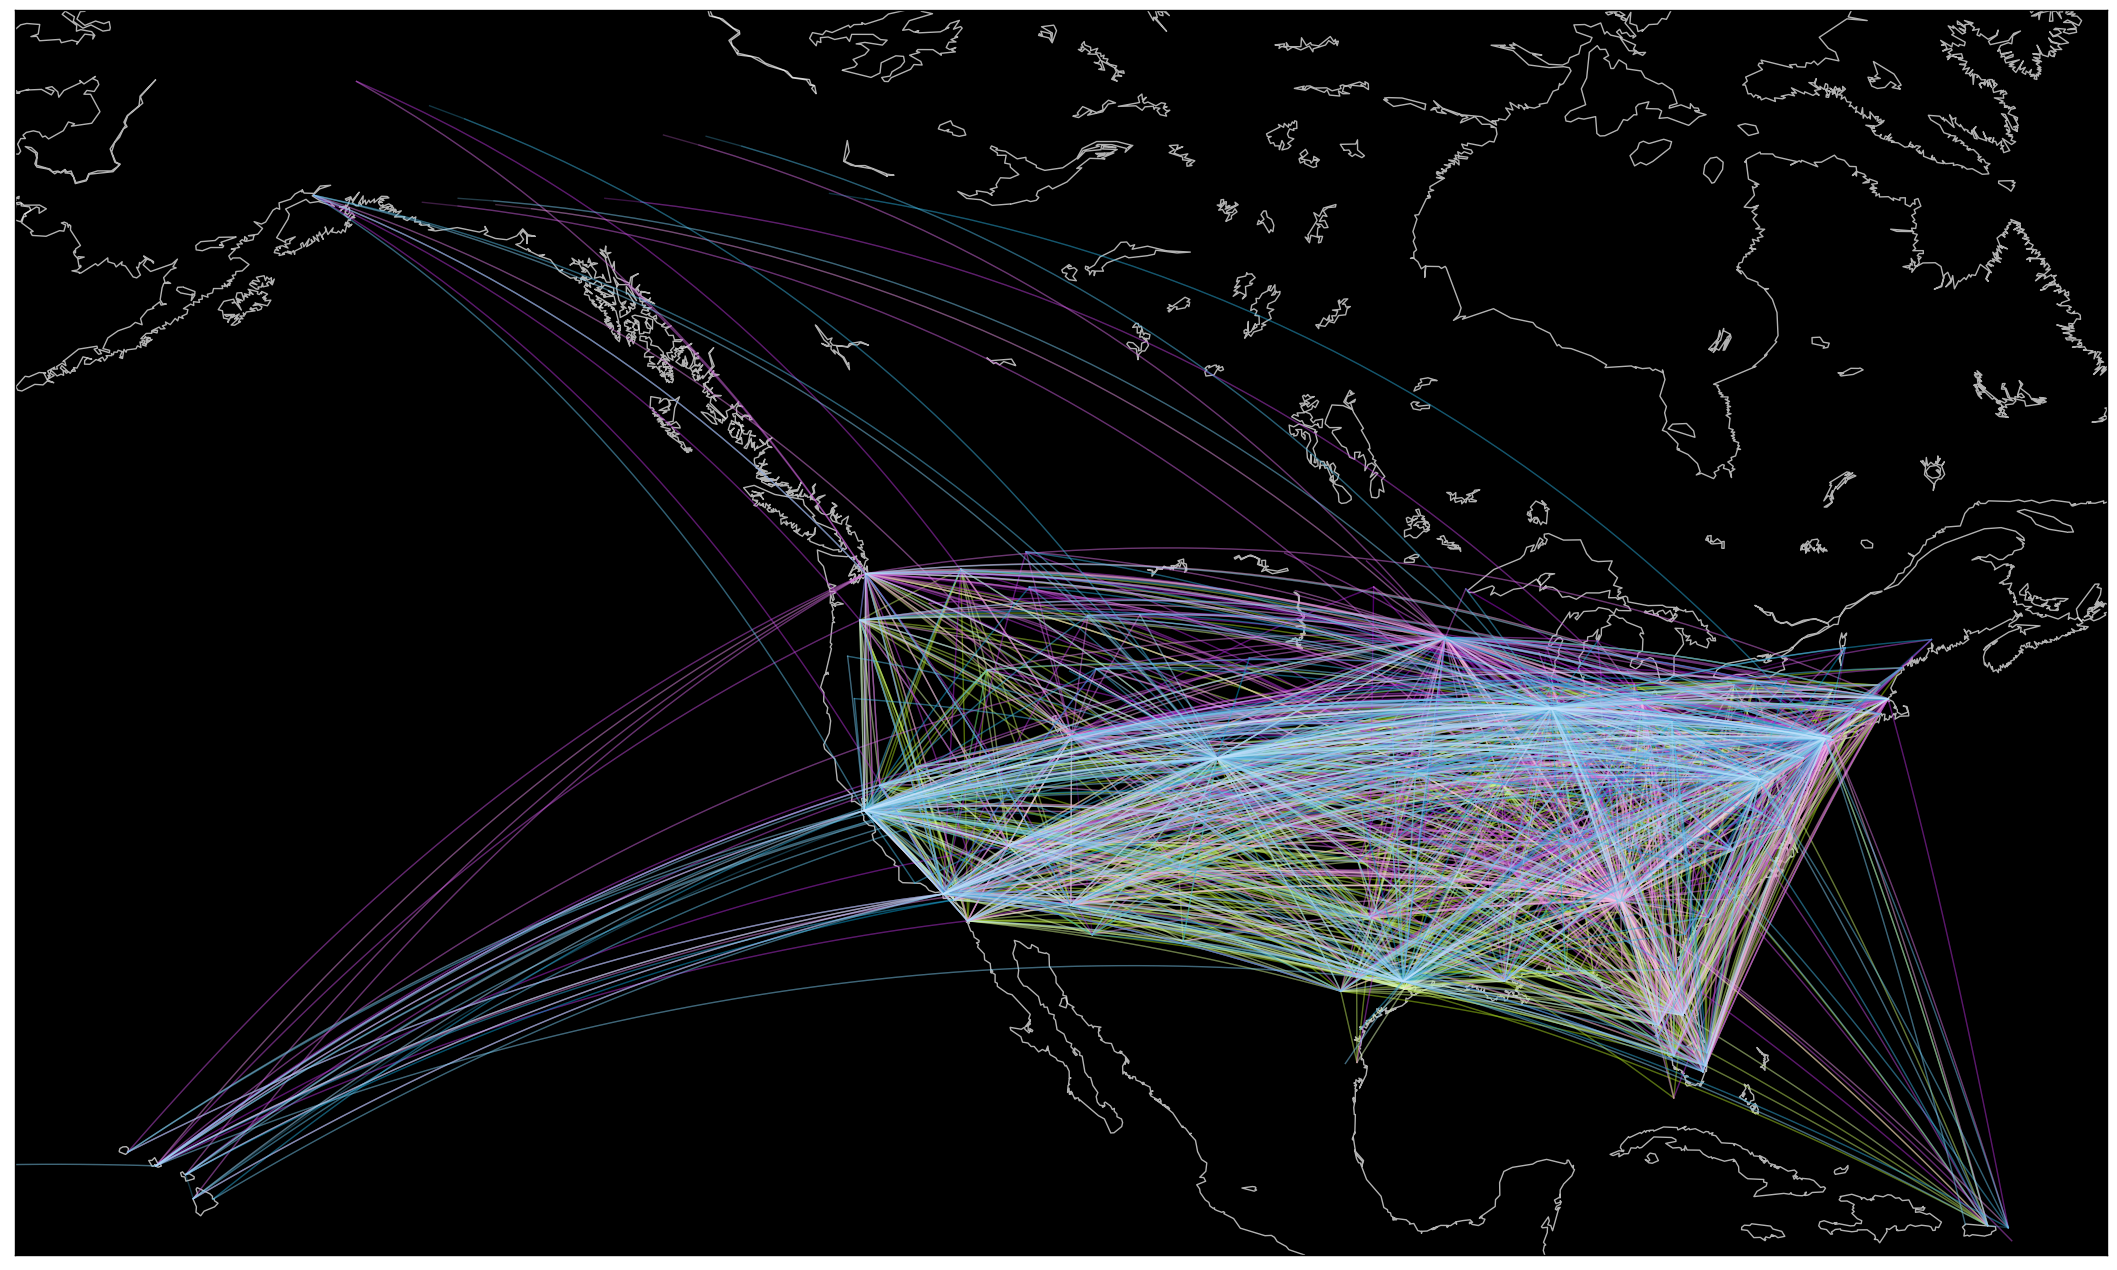

In [5]:
fig, ax = plt.subplots(figsize=(27,20))
m = Basemap(projection='mill', resolution='l', llcrnrlon=-60,llcrnrlat=17,urcrnrlon=-165, urcrnrlat=67)
m.drawcoastlines(color=outlineColor, linewidth=1.0)
m.fillcontinents(color=backgroundColor, lake_color=backgroundColor)
m.drawmapboundary(fill_color=backgroundColor)

interval = ax.xaxis.get_view_interval()
ax.set_xlim(sorted(interval), auto=None)


for index, route in enumerate(southwestRoutes.sort_values(by='count', ascending=True).iterrows()):
    route = route[1]
    color = southwestCmap(index * 1.0 / len(southwestRoutes.index))
    
    line, = m.drawgreatcircle(route['orig_lon'], route['orig_lat'], 
                              route['dest_long'], route['dest_lat'], 
                              linewidth=1, color=color, alpha=0.3)

for index, route in enumerate(deltaRoutes.sort_values(by='count', ascending=True).iterrows()):
    route = route[1]
    color = deltaCmap(index * 1.0 / len(deltaRoutes.index))
    
    line, = m.drawgreatcircle(route['orig_lon'], route['orig_lat'], 
                              route['dest_long'], route['dest_lat'], 
                              linewidth=1, color=color, alpha=0.3)
    
for index, route in enumerate(unitedRoutes.sort_values(by='count', ascending=True).iterrows()):
    route = route[1]
    color = unitedCmap(index * 1.0 / len(unitedRoutes.index))
    
    line, = m.drawgreatcircle(route['orig_lon'], route['orig_lat'], 
                              route['dest_long'], route['dest_lat'], 
                              linewidth=1, color=color, alpha=0.3)